PCA breakdown in featurehunt of heartrate data

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd

In [272]:
#Import heart data
filename = 'HR_data_transformed.csv'
df_hr = pd.read_csv(filename, sep=',', header = 0)
df_hr.drop(['Unnamed: 0'], axis=1, inplace=True)
raw_data = df_hr.values

In [273]:
#One-out-of-K
def one_out_of_k(column, categories):
    matrix = np.zeros((len(column), len(categories)))
    cat_dict = dict()
    for i in range(len(categories)):
        cat_dict[categories[i]] = i
    for i in range(len(column)):
        matrix[i][cat_dict[column[i]]] = 1
    return matrix

raw_data_X=np.zeros((len(raw_data),32))
raw_data_X[0:,:6]=raw_data[0:,:6]
raw_data_6=one_out_of_k(raw_data[:,6],[1,2,3,4])
raw_data_X[:,6:10]=raw_data_6
raw_data_7=one_out_of_k(raw_data[:,7],[1,2,3])
raw_data_X[:,10:13]=raw_data_7
raw_data_8=one_out_of_k(raw_data[:,8],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
raw_data_X[:,13:27]=raw_data_8
raw_data_9=one_out_of_k(raw_data[:,9],[0,1])
raw_data_X[:,27:29]=raw_data_9
raw_data_10=raw_data[0:,10]
raw_data_X[:,29]=raw_data_10
raw_data_11=one_out_of_k(raw_data[:,11],[1,2])
raw_data_X[:,30:32]=raw_data_11

In [274]:
ratioValues = [0,1,2,3,4,5,29]
for columnNr in ratioValues:
    mean = raw_data_X[:,columnNr].mean()
    std = raw_data_X[:,columnNr].std()
    raw_data_X[:,columnNr] = (raw_data_X[:,columnNr] - mean) / std

cols = range(32)
X = raw_data_X[:, cols]
attributeNames = np.asarray(['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round 1','Round 2', 'Round 3', 'Round 4', 'Phase 1', 'Phase 2', 'Phase 3' , 'Individual 1', 'Individual 2', 'Individual 3', 'Individual 4', 'Individual 5', 'Individual 6', 'Individual 7', 'Individual 8', 'Individual 9', 'Individual 10', 'Individual 11', 'Individual 12', 'Individual 13', 'Individual 14', 'Puzzler 0', 'Puzzler 1', 'Frustration', 'Cohort 1', 'Cohort 2'])
attributeByLetters = np.asarray(['Mean', 'Median', 'std', 'Min', 'Max', 'AUC', 'R1', 'R2', 'R3', 'R4', 'P1', 'P2', 'P3', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'PZ1','PZ2','F','C1','C2'])
classLabels = raw_data_X[:,-1]
classNames = np.unique(classLabels)
classDict = dict(zip(classNames,range(len(classNames))))
y = np.array([classDict[cl] for cl in classLabels])
N, M = X.shape
C = len(classNames)

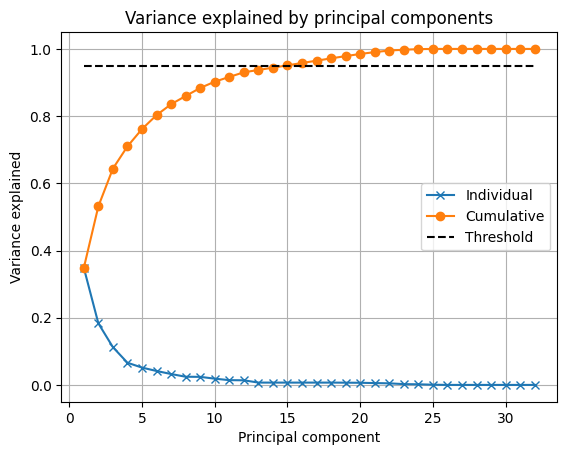

Plotted variances explained by PC's and cumulative variance


In [275]:
# Compute PCA, Plot variance explained by PC's, Plot cumulative variance
Y = X - np.ones((N,1))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()



print('Plotted variances explained by PC\'s and cumulative variance')

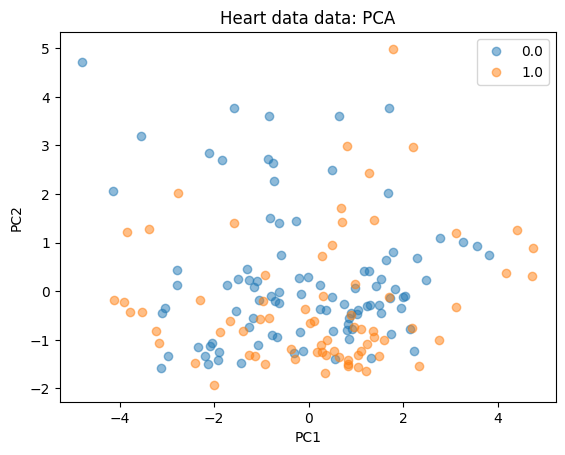

Plotted PC's 0 and 1  against each other


In [276]:
# Plot PC's i and j  against each other
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('Heart data data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

print(f'Plotted PC\'s {i} and {j}  against each other')

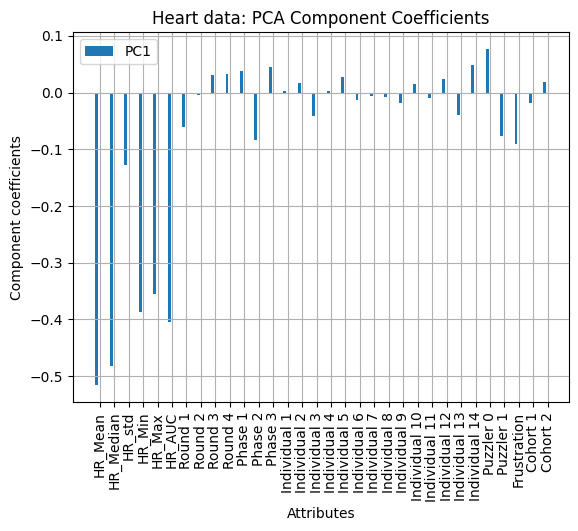

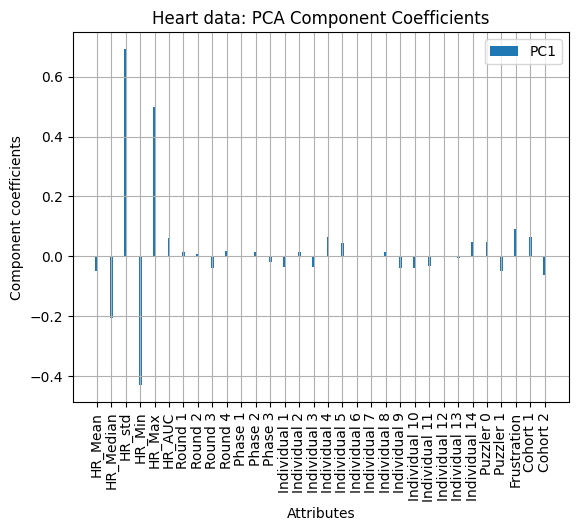

In [277]:
pcs = [0, 1]
legendStrs = ['PC' + str(e + 1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1, M + 1)

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width = bw)
    plt.xticks(r + bw, attributeNames, rotation=90)
    plt.xlabel('Attributes')
    plt.ylabel('Component coefficients')
    plt.legend(legendStrs)
    plt.grid()
    plt.title('Heart data: PCA Component Coefficients')
    plt.show()

In [278]:
# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print('PC2:')
print(V[:,1].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_sick_data = Y[y==1,:]

print('First observation')
print(all_sick_data[0,:])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
print('...and its projection onto PC2')
print(all_sick_data[0,:]@V[:,2])
# Try to explain why?

PC2:
[-0.04824719 -0.2062506   0.69241985 -0.42981247  0.49840563  0.06042724
  0.01473825  0.00911141 -0.04016047  0.01631081  0.0021713   0.01532018
 -0.01749148 -0.03388472  0.01345044 -0.03512343  0.06488318  0.04516529
 -0.00094693 -0.00361646  0.013075   -0.03792613 -0.03978945 -0.03055034
  0.0027647  -0.00523849  0.04773733  0.04814135 -0.04814135  0.09123986
  0.06300238 -0.06300238]
First observation
[-0.05115155  0.03077035 -0.74673812  0.48815149 -0.52897633 -0.40973244
 -0.25       -0.25        0.75       -0.25       -0.33333333 -0.33333333
  0.66666667 -0.07142857 -0.07142857 -0.07142857 -0.07142857 -0.07142857
 -0.07142857 -0.07142857 -0.07142857  0.92857143 -0.07142857 -0.07142857
 -0.07142857 -0.07142857 -0.07142857 -0.5         0.5        -0.15198421
 -0.57142857  0.57142857]
...and its projection onto PC2
0.2750879295439126


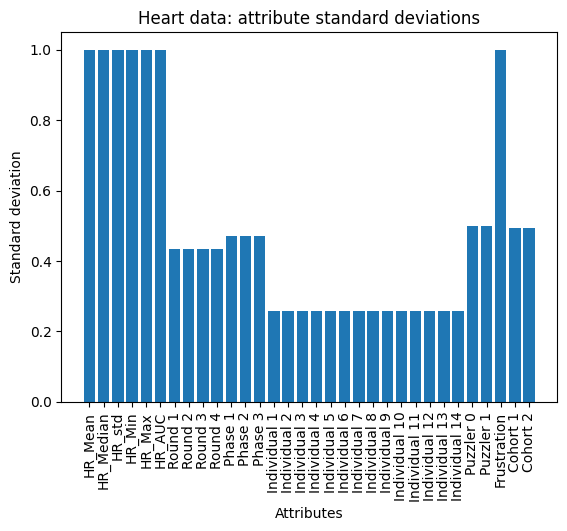

In [280]:
# Plot standard deviations
r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames, rotation=90)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('Heart data: attribute standard deviations')
plt.show()

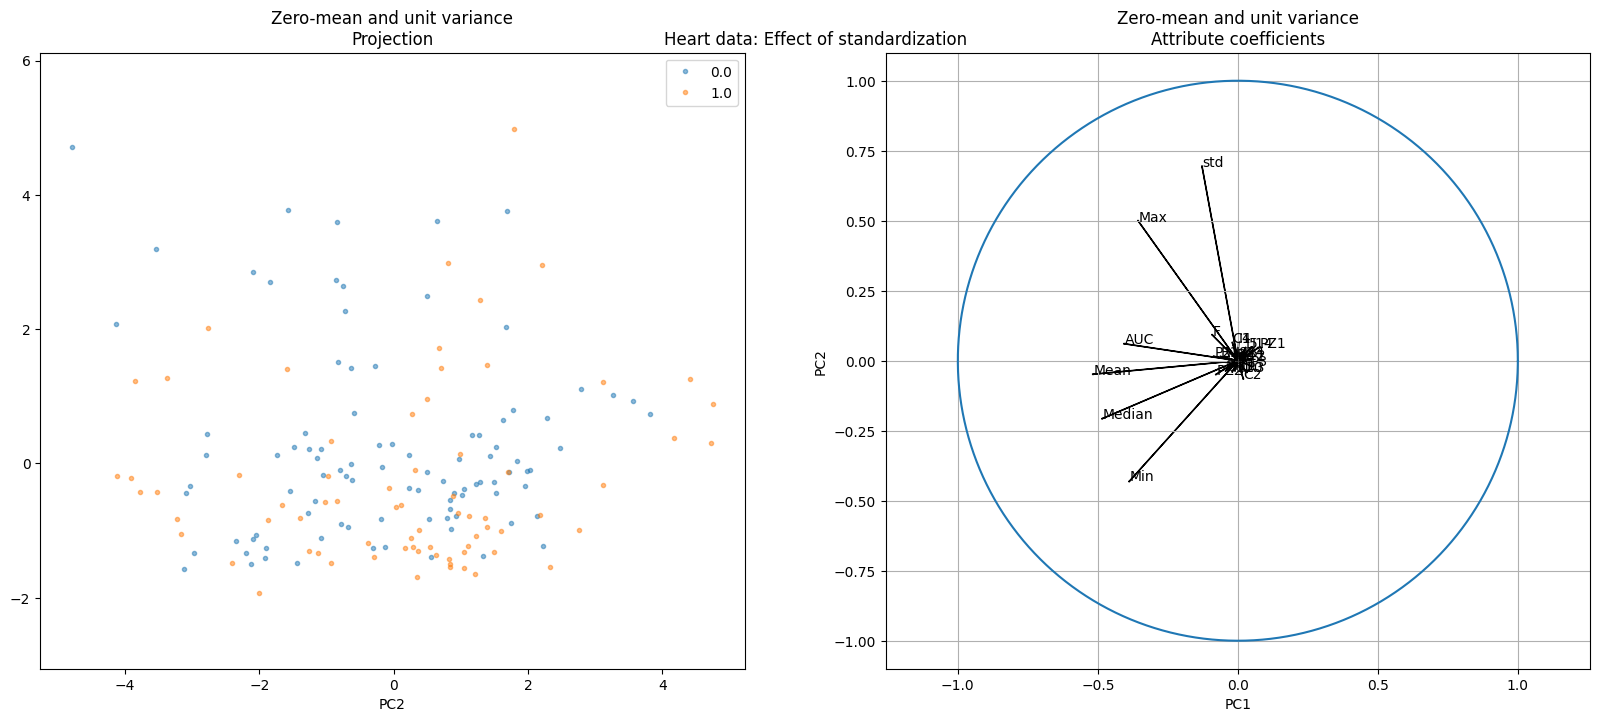

In [302]:
# Store the two in a cell, so we can just loop over them:
title = 'Zero-mean and unit variance'
threshold = 0.90
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=.4)
plt.title('Heart data: Effect of standardization')
plt.axis('off')
nrows=1
ncols=2

#if k==1: V = -V; U = -U; 
# Compute the projection onto the principal components
Z = U*S;

# Plot projection
plt.subplot(nrows, ncols, 1)
C = len(classNames)
for c in range(C):
    plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
plt.xlabel('PC'+str(i+1))
plt.xlabel('PC'+str(j+1))
plt.title(title + '\n' + 'Projection' )
plt.legend(classNames)
plt.axis('equal')

# Plot attribute coefficients in principal component space
plt.subplot(nrows, ncols,  2)
for att in range(V.shape[1]):
    plt.arrow(0,0, V[att,i], V[att,j])
    plt.text(V[att,i], V[att,j], attributeByLetters[att])
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('PC'+str(i+1))
plt.ylabel('PC'+str(j+1))
plt.grid()
# Add a unit circle
plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
     np.sin(np.arange(0, 2*np.pi, 0.01)));
plt.title(title +'\n'+'Attribute coefficients')
plt.axis('equal')

plt.show()